# 機器學習理論與實作 練習三

## Cross validation 交叉驗證實作 (實際會採用的方式)

### Load data

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
data = datasets.load_iris()

### Format data

In [3]:
iris = pd.DataFrame(data["data"], columns=data["feature_names"])
iris["target"] = data["target"]

In [4]:
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [5]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### K-fold CV (評估模型的分數)

In [6]:
from sklearn.model_selection import KFold, cross_val_score

In [7]:
k_fold = KFold(n_splits=5, shuffle=True)   # n_splits=k值=分5群 , shuffle洗牌

In [8]:
for train_indices, test_indices in k_fold.split(iris["target"]):
    print("Train: {} | test: {}".format(train_indices, test_indices))
# 依照 k_fold.split(iris["target"] 均勻分配在不同群

Train: [  0   1   2   3   4   6   7   8  10  11  12  13  14  15  16  19  21  22
  23  24  25  26  28  29  30  31  32  33  34  35  36  38  39  41  42  44
  45  47  48  50  51  52  53  54  56  58  59  60  61  62  63  64  65  66
  67  68  69  71  72  73  74  76  77  78  81  82  83  84  85  87  88  89
  90  93  94  95  96  97 100 101 102 103 104 105 107 109 110 111 113 115
 117 118 119 120 121 122 123 124 125 126 128 129 130 131 132 133 135 136
 137 138 140 141 142 143 144 145 146 147 148 149] | test: [  5   9  17  18  20  27  37  40  43  46  49  55  57  70  75  79  80  86
  91  92  98  99 106 108 112 114 116 127 134 139]
Train: [  0   1   2   3   5   6   7   8   9  13  15  16  17  18  20  21  22  23
  26  27  28  29  31  33  35  36  37  38  39  40  41  42  43  44  45  46
  47  49  50  51  53  54  55  57  58  59  60  61  62  64  66  68  70  71
  72  73  74  75  77  78  79  80  81  83  85  86  87  88  89  90  91  92
  93  94  96  97  98  99 100 101 102 104 106 107 108 109 110 111 112 114
 1

### Training model

In [9]:
from sklearn.svm import SVC

In [10]:
svc = SVC(gamma="auto")

### Training model with CV

In [11]:
[svc.fit(iris.iloc[train, 0:3].values, iris.loc[train, "target"].values).score(iris.iloc[test, 0:3].values, iris.loc[test, "target"].values)
 for train, test in k_fold.split(iris["target"])]

# x = iris.iloc[train, 0:3].values , y = iris.loc[train, "target"].values


[0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9,
 0.9666666666666667]

### 以上為各個模型的準確率

# <font color='blue'>常用寫法

In [12]:
for train, test in k_fold.split(iris["target"]):
    print(svc.fit(iris.iloc[train, 0:3].values, iris.loc[train, "target"].values).score(iris.iloc[test, 0:3].values, iris.loc[test, "target"].values))

0.9333333333333333
0.9333333333333333
1.0
0.9333333333333333
0.9333333333333333


## <font color='blue'>上述程式拆解

In [13]:
for train, test in k_fold.split(iris["target"]):
    print('\n train: ', train)
    print('test: ', test)


 train:  [  0   2   4   5   6   7   8   9  11  12  13  14  15  17  18  19  20  21
  23  26  27  28  29  30  31  32  33  34  35  36  37  39  40  41  43  44
  45  46  47  48  49  50  51  52  53  55  58  59  61  62  63  65  66  67
  69  70  71  72  73  74  75  76  78  79  80  81  83  85  86  87  88  89
  90  92  93  94  95  97  98  99 100 101 102 103 105 106 107 111 112 113
 114 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 137 138 140 141 144 146 147 148 149]
test:  [  1   3  10  16  22  24  25  38  42  54  56  57  60  64  68  77  82  84
  91  96 104 108 109 110 115 136 139 142 143 145]

 train:  [  1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  21  22  23  24  25  26  28  30  31  32  33  35  36  37  38  39  41  42
  43  46  47  49  50  51  52  53  54  55  56  57  58  60  61  62  63  64
  65  66  68  69  70  71  74  75  76  77  78  80  81  82  83  84  86  87
  88  89  90  91  92  93  94  96  98  99 100 101 102 103 104 105 106 1

## <font color='blue'>訓練資料 120筆

In [74]:
iris.iloc[train, 0:3].values

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.1, 3.8, 1.5],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3, 1.3],
       [5. , 3.5, 1.6],
       [5.1, 3.8, 1.6],
       [5.3, 3.7, 1.5],
       [5. , 3.3, 1.4],
       [7. , 3.2, 4.7],
       [6.4, 3.2

In [73]:
iris.loc[train, "target"].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## <font color='blue'>測試資料 30筆

In [75]:
iris.iloc[test, 0:3].values

array([[5. , 3.4, 1.5],
       [5.8, 4. , 1.2],
       [5.7, 3.8, 1.7],
       [5.4, 3.4, 1.7],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [4.4, 3.2, 1.3],
       [5.1, 3.8, 1.9],
       [4.8, 3. , 1.4],
       [4.6, 3.2, 1.4],
       [5.5, 2.3, 4. ],
       [6.6, 2.9, 4.6],
       [5.6, 2.9, 3.6],
       [5.8, 2.7, 4.1],
       [6.1, 2.8, 4.7],
       [6.6, 3. , 4.4],
       [5.5, 2.4, 3.7],
       [5.4, 3. , 4.5],
       [6.3, 2.3, 4.4],
       [5.7, 2.9, 4.2],
       [7.6, 3. , 6.6],
       [4.9, 2.5, 4.5],
       [7.7, 2.6, 6.9],
       [6.9, 3.2, 5.7],
       [5.6, 2.8, 4.9],
       [6.4, 2.8, 5.6],
       [7.2, 3. , 5.8],
       [7.7, 3. , 6.1],
       [6.5, 3. , 5.2],
       [5.9, 3. , 5.1]])

In [76]:
iris.loc[test, "target"].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

# CV scoring

## [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [87]:
cross_val_score(svc, iris.iloc[:, 0:3].values, iris["target"].values, cv=k_fold, n_jobs=-1)

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 0.96666667])

In [14]:
cross_val_score(svc, iris.iloc[:, 0:3].values, iris["target"].values, cv=k_fold, n_jobs=-1,
                scoring='precision_macro')
# cross_val_score 交叉驗證評估分數
# scoring='precision_macro' 精準度

array([0.96969697, 0.93939394, 0.94444444, 0.89259259, 1.        ])

# Let's clustering!

## [clustering](https://scikit-learn.org/stable/modules/clustering.html)

* K-means
* Affinity propagation
* DBSCAN
* Hierarchical clustering (AgglomerativeClustering)

## K-means

## [參考網址](http://members.cbio.mines-paristech.fr/~nvaroquaux/teaching/2016-image-xd/packages/scikit-learn/index.html)

In [115]:
data = datasets.load_iris()
iris = pd.DataFrame(data["data"], columns=data["feature_names"])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [103]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [104]:
print(k_means.labels_[::10])  #間隔10

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]


In [105]:
print(k_means.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [106]:
k_means.labels_[:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [107]:
iris['k_means'] = k_means.labels_.tolist()
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),k_means
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [112]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## data['target']

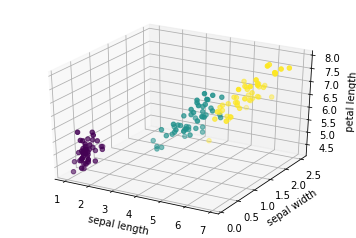

In [113]:
x, y, z = iris['petal length (cm)'], iris['petal width (cm)'], iris['sepal length (cm)']
ax = plt.subplot(111, projection='3d') 
ax.scatter(x, y, z, c=data['target']) 

ax.set_zlabel('petal length')
ax.set_ylabel('sepal width')
ax.set_xlabel('sepal length')
plt.show()

## iris['k_means']

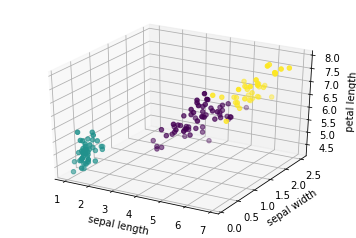

In [114]:
x, y, z = iris['petal length (cm)'], iris['petal width (cm)'], iris['sepal length (cm)']
ax = plt.subplot(111, projection='3d') 
ax.scatter(x, y, z, c=iris['k_means'])  

ax.set_zlabel('petal length')
ax.set_ylabel('sepal width')
ax.set_xlabel('sepal length')
plt.show()

## 分群效果略差